In [1]:
# Create grouped bar charts for AV and AVT codebook ablations (first plot strategy).
# This script saves two separate figures (no subplots), one for AV and one for AVT.

import matplotlib.pyplot as plt
import numpy as np

# Data
codebooks = np.array([128, 256, 400, 512, 800], dtype=int)
labels = [str(c) for c in codebooks]

# AV setting
av_ave_va = np.array([48.9, 45.7, 45.3, 46.4, 47.6])
av_ave_av = np.array([50.5, 46.4, 49.8, 48.4, 49.7])
av_avvp_va = np.array([62.69, 63.51, 67.16, 58.28, 62.62])
av_avvp_av = np.array([66.21, 73.06, 69.53, 72.00, 72.38])

# AVT setting
avt_ave_va = np.array([50.6, 53.0, 52.0, 54.02, 52.27])
avt_ave_av = np.array([53.6, 53.3, 53.7, 53.5, 55.47])
avt_avvp_va = np.array([69.39, 72.00, 65.42, 67.12, 70.81])
avt_avvp_av = np.array([72.87, 72.23, 69.51, 73.62, 72.51])

def grouped_bar_chart(filename, title, ave_va, ave_av, avvp_va, avvp_av):
    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots(figsize=(8, 4.2))
    ax.bar(x - 1.5*width, ave_va, width, label='AVE: V→A')
    ax.bar(x - 0.5*width, ave_av, width, label='AVE: A→V')
    ax.bar(x + 0.5*width, avvp_va, width, label='AVVP: V→A')
    ax.bar(x + 1.5*width, avvp_av, width, label='AVVP: A→V')

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('Number of codebooks (K)')
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.legend(ncol=2, frameon=False, fontsize=9)
    ax.grid(axis='y', linestyle=':', linewidth=0.7, alpha=0.6)
    fig.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)

grouped_bar_chart('ablation_codebooks_AV.png',
                  'Codebook Count Ablation — AV pre-training (VGGSound-AVEL 40K)',
                  av_ave_va, av_ave_av, av_avvp_va, av_avvp_av)

grouped_bar_chart('ablation_codebooks_AVT.png',
                  'Codebook Count Ablation — AVT pre-training (VGGSound-AVEL 40K)',
                  avt_ave_va, avt_ave_av, avt_avvp_va, avt_avvp_av)


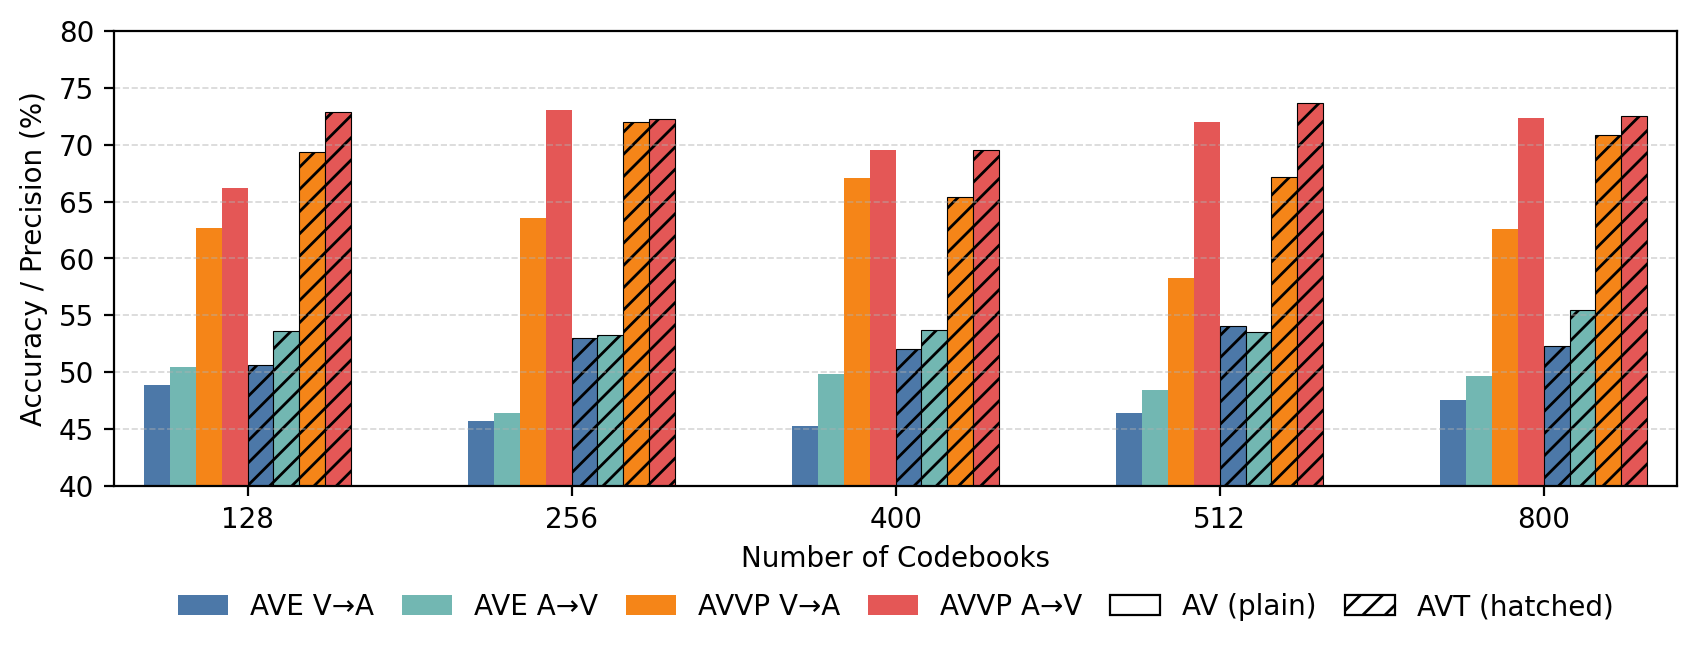

In [2]:
# One-figure ablation plot (Option A): AV vs AVT on codebook counts
# - 4 metrics (colors): AVE V→A, AVE A→V, AVVP V→A, AVVP A→V
# - Settings (hatch): AV = plain, AVT = '///'
# - Legend: single horizontal line placed below the plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# -----------------------------
# Data (your reported numbers)
# -----------------------------
x_labels = ['128', '256', '400', '512', '800']
x = np.arange(len(x_labels))

# AV setting (plain bars)
av_ave_va  = np.array([48.9, 45.7, 45.3, 46.4, 47.6])
av_ave_av  = np.array([50.5, 46.4, 49.8, 48.4, 49.7])
av_avvp_va = np.array([62.69, 63.51, 67.10, 58.28, 62.62])
av_avvp_av = np.array([66.21, 73.06, 69.53, 72.00, 72.38])

# AVT setting (hatched bars)
avt_ave_va  = np.array([50.6, 53.0, 52.0, 54.02, 52.27])
avt_ave_av  = np.array([53.6, 53.3, 53.7, 53.5, 55.47])
avt_avvp_va = np.array([69.39, 72.00, 65.42, 67.12, 70.81])
avt_avvp_av = np.array([72.87, 72.23, 69.51, 73.62, 72.51])

# -----------------------------
# Plot styling
# -----------------------------
colors = {
    'AVE V→A'  : '#4C78A8',
    'AVE A→V'  : '#72B7B2',
    'AVVP V→A' : '#F58518',
    'AVVP A→V' : '#E45756',
}
metrics = ['AVE V→A','AVE A→V','AVVP V→A','AVVP A→V']

# bar width and offsets so bars never overlap
w = 0.08
offsets_av  = np.array([-3.5, -2.5, -1.5, -0.5]) * w  # 4 metrics (AV)
offsets_avt = np.array([ 0.5,  1.5,  2.5,  3.5]) * w  # 4 metrics (AVT)

fig, ax = plt.subplots(figsize=(8.8, 3.4), dpi=200)

# -----------------------------
# Draw bars: AV (plain)
# -----------------------------
ax.bar(x + offsets_av[0], av_ave_va,  width=w, color=colors['AVE V→A'],  edgecolor='none')
ax.bar(x + offsets_av[1], av_ave_av,  width=w, color=colors['AVE A→V'],  edgecolor='none')
ax.bar(x + offsets_av[2], av_avvp_va, width=w, color=colors['AVVP V→A'], edgecolor='none')
ax.bar(x + offsets_av[3], av_avvp_av, width=w, color=colors['AVVP A→V'], edgecolor='none')

# -----------------------------
# Draw bars: AVT (hatched, same colors)
# -----------------------------
ax.bar(x + offsets_avt[0], avt_ave_va,  width=w, color=colors['AVE V→A'],  hatch='///', edgecolor='black', linewidth=0.4)
ax.bar(x + offsets_avt[1], avt_ave_av,  width=w, color=colors['AVE A→V'],  hatch='///', edgecolor='black', linewidth=0.4)
ax.bar(x + offsets_avt[2], avt_avvp_va, width=w, color=colors['AVVP V→A'], hatch='///', edgecolor='black', linewidth=0.4)
ax.bar(x + offsets_avt[3], avt_avvp_av, width=w, color=colors['AVVP A→V'], hatch='///', edgecolor='black', linewidth=0.4)

# -----------------------------
# Axes, ticks, grid
# -----------------------------
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Number of Codebooks')
ax.set_ylabel('Accuracy / Precision (%)')
ax.set_ylim(40, 80)
ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)
ax.margins(x=0.02)

# -----------------------------
# Single horizontal legend below
#   - 4 color entries (metrics)
#   - 2 hatch entries (settings)
# -----------------------------
metric_handles = [
    Patch(facecolor=colors['AVE V→A'],  edgecolor='none', label='AVE V→A'),
    Patch(facecolor=colors['AVE A→V'],  edgecolor='none', label='AVE A→V'),
    Patch(facecolor=colors['AVVP V→A'], edgecolor='none', label='AVVP V→A'),
    Patch(facecolor=colors['AVVP A→V'], edgecolor='none', label='AVVP A→V'),
]
setting_handles = [
    Patch(facecolor='white', edgecolor='black', linewidth=0.8, label='AV (plain)'),
    Patch(facecolor='white', edgecolor='black', hatch='///', linewidth=0.8, label='AVT (hatched)'),
]
handles = metric_handles + setting_handles

ax.legend(
    handles=handles,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.18),  # put legend below plot
    ncol=6,
    frameon=False,
    handlelength=1.8,
    columnspacing=1.0
)

plt.tight_layout(pad=1.0)
# plt.savefig('ablation_codebooks_AV_vs_AVT_oneplot.png', bbox_inches='tight')
# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/user-data/outputs/pretraining_comparison.png'

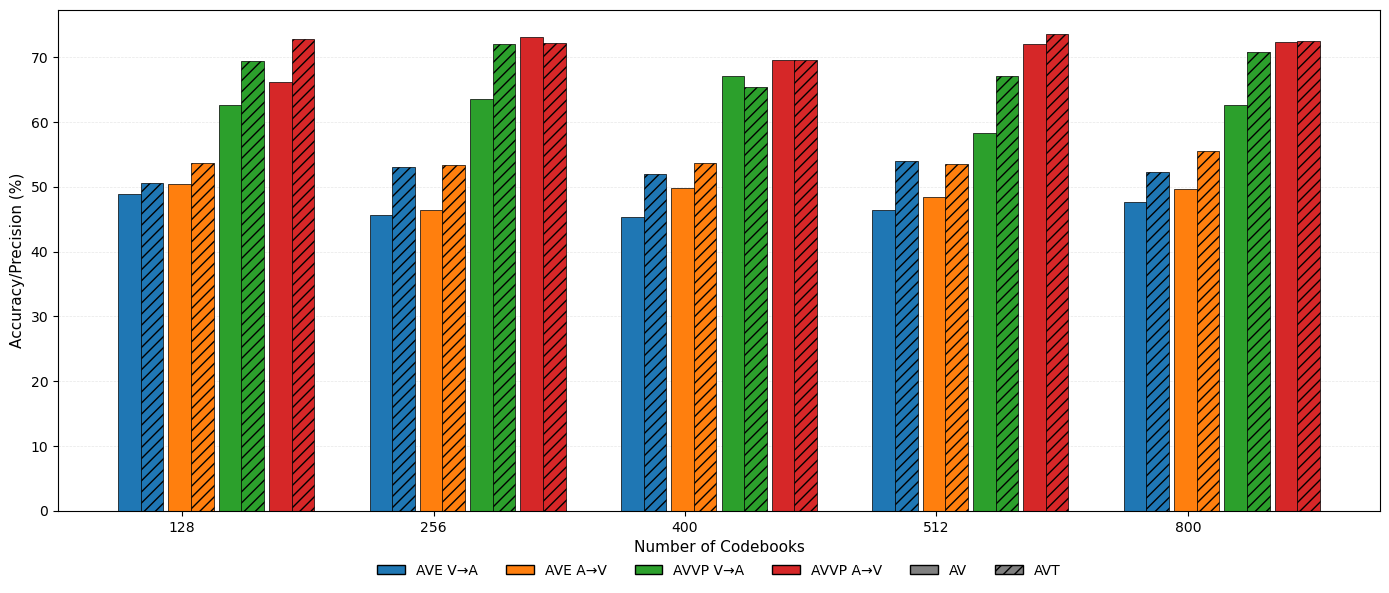

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
codebooks = [128, 256, 400, 512, 800]

# AV pre-training data
av_data = {
    'AVE V→A': [48.9, 45.7, 45.3, 46.4, 47.6],
    'AVE A→V': [50.5, 46.4, 49.8, 48.4, 49.7],
    'AVVP V→A': [62.69, 63.51, 67.16, 58.28, 62.62],
    'AVVP A→V': [66.21, 73.06, 69.53, 72.00, 72.38]
}

# AVT pre-training data
avt_data = {
    'AVE V→A': [50.6, 53.0, 52.0, 54.02, 52.27],
    'AVE A→V': [53.6, 53.3, 53.7, 53.5, 55.47],
    'AVVP V→A': [69.39, 72.00, 65.42, 67.12, 70.81],
    'AVVP A→V': [72.87, 72.23, 69.51, 73.62, 72.51]
}

# Create figure
fig, ax = plt.subplots(figsize=(14, 6))

# Settings
x = np.arange(len(codebooks))
metrics = list(av_data.keys())
n_metrics = len(metrics)
bar_width = 0.09
group_gap = 0.02

# Colors for each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot bars
for i, metric in enumerate(metrics):
    # Calculate positions for this metric's pair of bars
    offset = (i * 2 * bar_width) + (i * group_gap) - (n_metrics * bar_width + (n_metrics - 1) * group_gap) / 2
    
    # AV bars (no hatch)
    ax.bar(x + offset, av_data[metric], bar_width, 
           label=metric if i < len(metrics) else '', 
           color=colors[i], edgecolor='black', linewidth=0.5)
    
    # AVT bars (with hatch)
    ax.bar(x + offset + bar_width, avt_data[metric], bar_width,
           color=colors[i], edgecolor='black', linewidth=0.5, hatch='///')

# Customize plot
ax.set_ylabel('Accuracy/Precision (%)', fontsize=11)
ax.set_xlabel('Number of Codebooks', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(codebooks)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Create legends
from matplotlib.patches import Patch

# Metric legend (colors)
metric_handles = [Patch(facecolor=colors[i], edgecolor='black', label=metric) 
                  for i, metric in enumerate(metrics)]

# Setting legend (hatch)
setting_handles = [
    Patch(facecolor='gray', edgecolor='black', label='AV'),
    Patch(facecolor='gray', edgecolor='black', hatch='///', label='AVT')
]

# Combine all handles
all_handles = metric_handles + setting_handles

# Single horizontal legend below the plot
ax.legend(handles=all_handles, loc='upper center', bbox_to_anchor=(0.5, -0.08),
          ncol=6, frameon=False, fontsize=10)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/pretraining_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

print("Plot saved to /mnt/user-data/outputs/pretraining_comparison.png")

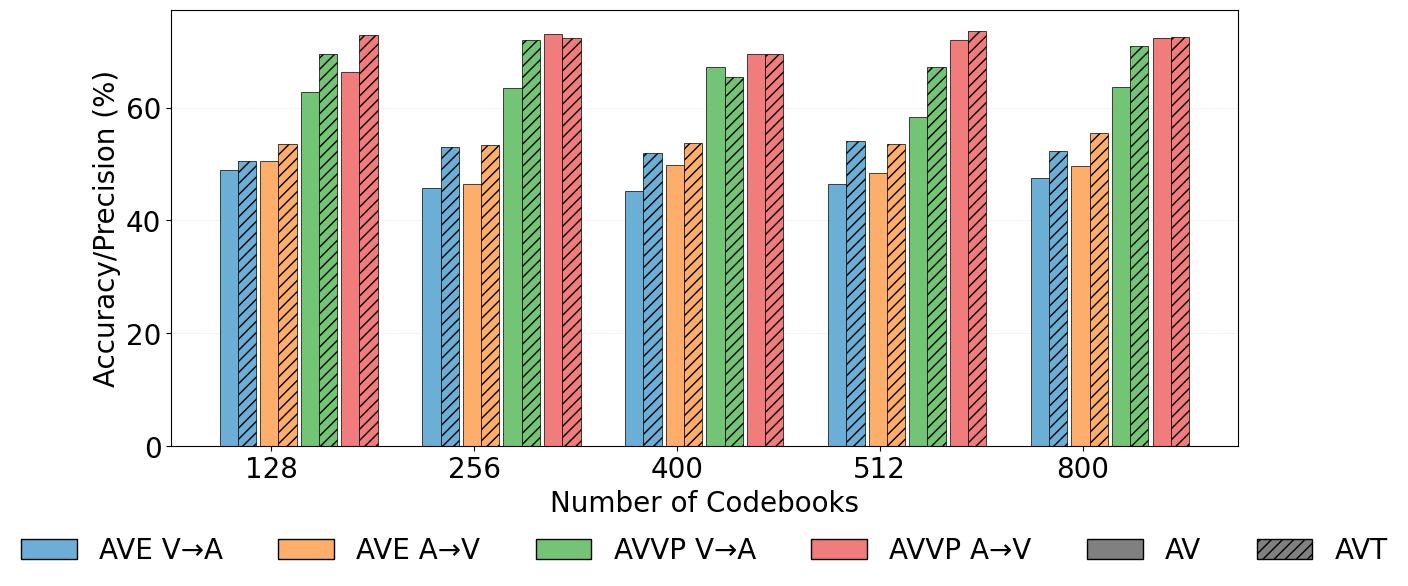

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data
codebooks = [128, 256, 400, 512, 800]

# AV pre-training data
av_data = {
    'AVE V→A': [48.9, 45.7, 45.3, 46.4, 47.6],
    'AVE A→V': [50.5, 46.4, 49.8, 48.4, 49.7],
    'AVVP V→A': [62.69, 63.51, 67.16, 58.28, 63.62],
    'AVVP A→V': [66.21, 73.06, 69.53, 72.00, 72.38]
}

# AVT pre-training data
avt_data = {
    'AVE V→A': [50.6, 53.0, 52.0, 54.02, 52.27],
    'AVE A→V': [53.6, 53.3, 53.7, 53.5, 55.47],
    'AVVP V→A': [69.39, 72.00, 65.42, 67.12, 70.81],
    'AVVP A→V': [72.87, 72.23, 69.51, 73.62, 72.51]
}

# Create figure
fig, ax = plt.subplots(figsize=(14, 6))

# Settings
x = np.arange(len(codebooks))
metrics = list(av_data.keys())
n_metrics = len(metrics)
bar_width = 0.09
group_gap = 0.02

# Lighter colors for each metric
colors = ['#6baed6', '#fdae6b', '#74c476', '#f07c7c']

# Plot bars
for i, metric in enumerate(metrics):
    # Calculate positions for this metric's pair of bars
    offset = (i * 2 * bar_width) + (i * group_gap) - (n_metrics * bar_width + (n_metrics - 1) * group_gap) / 2
    
    # AV bars (no hatch)
    ax.bar(x + offset, av_data[metric], bar_width, 
           label=metric if i < len(metrics) else '', 
           color=colors[i], edgecolor='black', linewidth=0.5)
    
    # AVT bars (with hatch)
    ax.bar(x + offset + bar_width, avt_data[metric], bar_width,
           color=colors[i], edgecolor='black', linewidth=0.5, hatch='///')

# Customize plot
ax.set_ylabel('Accuracy/Precision (%)', fontsize=20)
ax.set_xlabel('Number of Codebooks', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(codebooks)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Create legends
from matplotlib.patches import Patch

# Metric legend (colors)
metric_handles = [Patch(facecolor=colors[i], edgecolor='black', label=metric) 
                  for i, metric in enumerate(metrics)]

# Setting legend (hatch)
setting_handles = [
    Patch(facecolor='gray', edgecolor='black', label='AV'),
    Patch(facecolor='gray', edgecolor='black', hatch='///', label='AVT')
]

# Combine all handles
all_handles = metric_handles + setting_handles

# Single horizontal legend below the plot
ax.legend(handles=all_handles, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=6, frameon=False, fontsize=20)

plt.tight_layout()
plt.show()

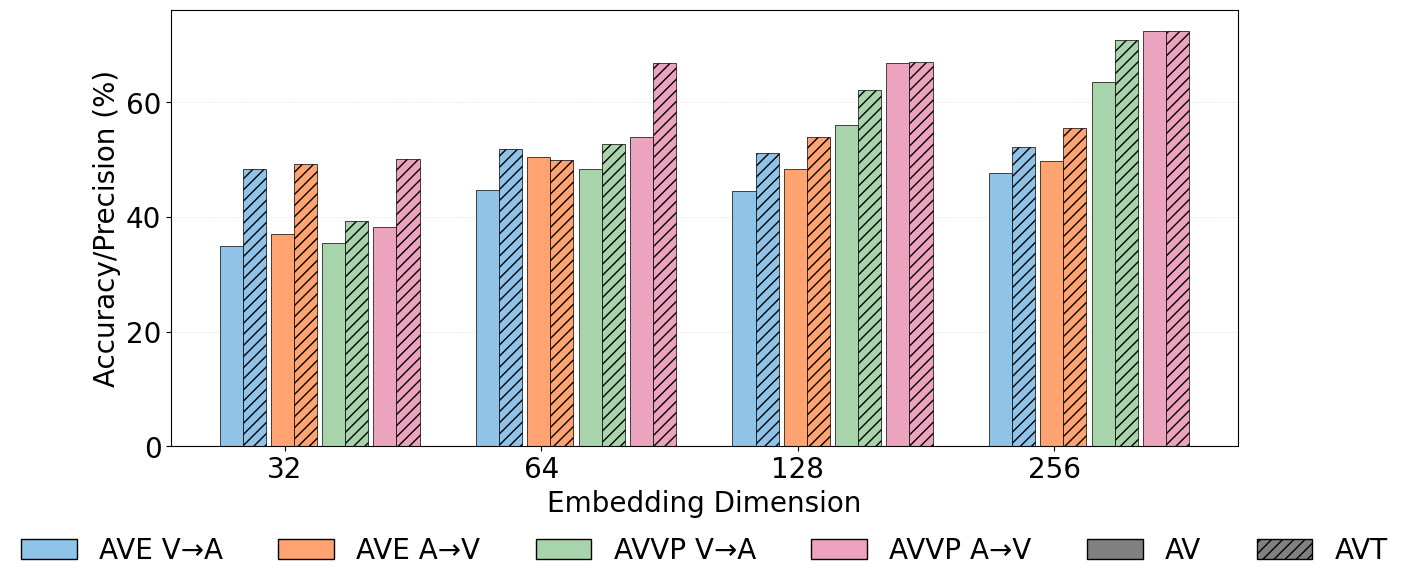

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
codebooks = [32, 64, 128, 256]

# AV pre-training data
av_data = {
    'AVE V→A': [35, 44.8, 44.5, 47.6],
    'AVE A→V': [37, 50.5, 48.4, 49.7],
    'AVVP V→A': [35.53, 48.35, 55.99, 63.62],
    'AVVP A→V': [38.26, 54.03, 66.85, 72.38]
}

# AVT pre-training data
avt_data = {
    'AVE V→A': [48.4, 51.8, 51.2, 52.27],
    'AVE A→V': [49.2, 49.9, 53.9, 55.47],
    'AVVP V→A': [39.23, 52.74, 62.21, 70.81],
    'AVVP A→V': [50.17, 66.89, 66.97, 72.51]
}

# Create figure
fig, ax = plt.subplots(figsize=(14, 6))

# Settings
x = np.arange(len(codebooks))
metrics = list(av_data.keys())
n_metrics = len(metrics)
bar_width = 0.09
group_gap = 0.02

# Lighter colors for each metric
# colors = ['#6baed6', '#fdae6b', '#74c476', '#f07c7c']
# colors = ['#a8dadc', '#ffb6a3', '#b8d4bb', '#e5b3d1']
# colors = ['#b4d7ed', '#ffc8a3', '#c9e4ca', '#f5c6d6']
colors = ['#8fc4e8', '#ffa370', '#a8d4ab', '#eca3bd']

# Plot bars
for i, metric in enumerate(metrics):
    # Calculate positions for this metric's pair of bars
    offset = (i * 2 * bar_width) + (i * group_gap) - (n_metrics * bar_width + (n_metrics - 1) * group_gap) / 2
    
    # AV bars (no hatch)
    ax.bar(x + offset, av_data[metric], bar_width, 
           label=metric if i < len(metrics) else '', 
           color=colors[i], edgecolor='black', linewidth=0.5)
    
    # AVT bars (with hatch)
    ax.bar(x + offset + bar_width, avt_data[metric], bar_width,
           color=colors[i], edgecolor='black', linewidth=0.5, hatch='///')

# Customize plot
ax.set_ylabel('Accuracy/Precision (%)', fontsize=20)
ax.set_xlabel('Embedding Dimension', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(codebooks)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Create legends
from matplotlib.patches import Patch

# Metric legend (colors)
metric_handles = [Patch(facecolor=colors[i], edgecolor='black', label=metric) 
                  for i, metric in enumerate(metrics)]

# Setting legend (hatch)
setting_handles = [
    Patch(facecolor='gray', edgecolor='black', label='AV'),
    Patch(facecolor='gray', edgecolor='black', hatch='///', label='AVT')
]

# Combine all handles
all_handles = metric_handles + setting_handles

# Single horizontal legend below the plot
ax.legend(handles=all_handles, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=6, frameon=False, fontsize=20)

plt.tight_layout()
plt.show()

/tmp/ipykernel_202875/1095255681.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


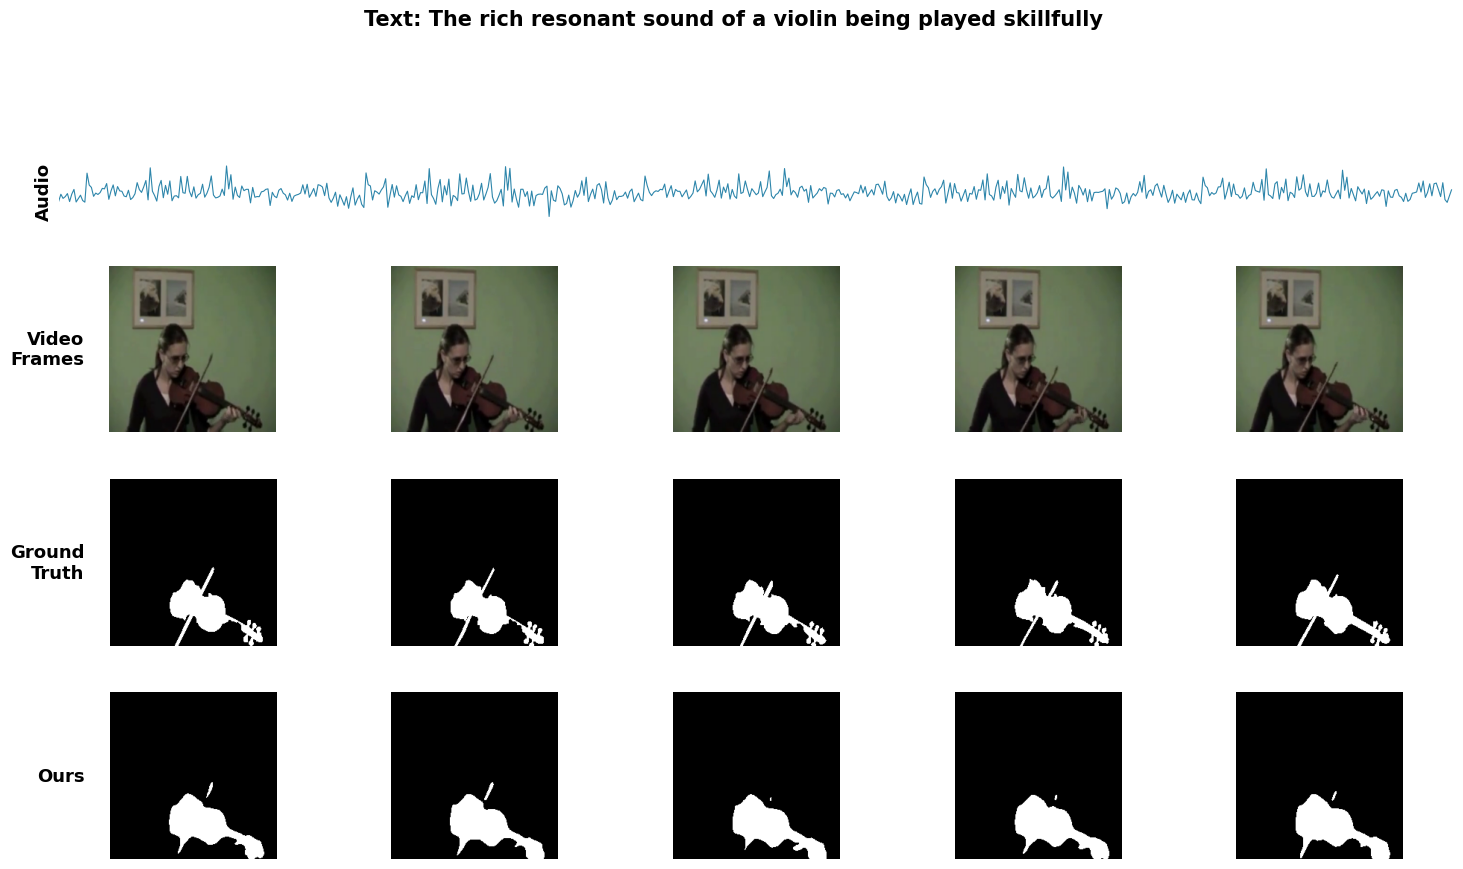

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import zipfile
import os

# Paths
text = "The rich resonant sound of a violin being played skillfully"
video_id = "-OWk1q8xH7s"

visual_frames_dir = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/Single-source/s4_data/visual_frames/test/playing_violin/{video_id}"
gt_masks_dir = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/Single-source/s4_data/gt_masks/test/playing_violin/{video_id}"
pred_masks_dir = f"/project/ag-jafra/Souptik/CMG_New/Experiments/CMG_trial1/Benchmarks/Downstream_AVS_Novel_4ep/40k/test/A2T/S4_pvt_20251026-141128/pred_masks/playing_violin/{video_id}"
audio_feature_path = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/feature/audio/test/zip/playing_violin/{video_id}.zip"

# Load audio feature from zip
with zipfile.ZipFile(audio_feature_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()
    with zip_ref.open(file_list[0]) as f:
        audio_feature = np.load(f, allow_pickle=True)  # Added allow_pickle=True

# Handle padding/truncation
if audio_feature.shape[0] < 5:
    cur_t = audio_feature.shape[0]
    add_arr = np.tile(audio_feature[-1, :], (5-cur_t, 1))
    audio_feature = np.concatenate([audio_feature, add_arr], axis=0)
elif audio_feature.shape[0] > 5:
    audio_feature = audio_feature[:5, :]

# Create figure
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(5, 5, height_ratios=[0.5, 1, 3, 3, 3], hspace=0.4, wspace=0.05)

# Add text at the top
fig.text(0.5, 0.96, f"Text: {text}", ha='center', va='top', fontsize=15, weight='bold')

# Plot audio waveform
ax_audio = fig.add_subplot(gs[1, :])
audio_flat = audio_feature.flatten()
ax_audio.plot(audio_flat, color='#2E86AB', linewidth=0.8)
ax_audio.set_xlim(0, len(audio_flat))
ax_audio.set_yticks([])
ax_audio.set_xticks([])
ax_audio.set_ylabel('Audio', fontsize=13, weight='bold')
ax_audio.spines['top'].set_visible(False)
ax_audio.spines['right'].set_visible(False)
ax_audio.spines['bottom'].set_visible(False)
ax_audio.spines['left'].set_visible(False)

# Load and display video frames
for i in range(5):
    ax = fig.add_subplot(gs[2, i])
    img = Image.open(f"{visual_frames_dir}/{video_id}_{i+1}.png")
    ax.imshow(img)
    ax.axis('off')
    if i == 0:
        ax.text(-0.15, 0.5, 'Video\nFrames', transform=ax.transAxes,
                fontsize=13, weight='bold', va='center', ha='right')

# Load and display ground truth masks
for i in range(5):
    ax = fig.add_subplot(gs[3, i])
    img = Image.open(f"{gt_masks_dir}/{video_id}_{i+1}.png")
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    if i == 0:
        ax.text(-0.15, 0.5, 'Ground\nTruth', transform=ax.transAxes,
                fontsize=13, weight='bold', va='center', ha='right')

# Load and display predicted masks
for i in range(5):
    ax = fig.add_subplot(gs[4, i])
    pred_video_id = video_id.lstrip('-')
    img = Image.open(f"{pred_masks_dir}/{video_id}_{i}.png")
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    if i == 0:
        ax.text(-0.15, 0.5, 'Ours', transform=ax.transAxes,
                fontsize=13, weight='bold', va='center', ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

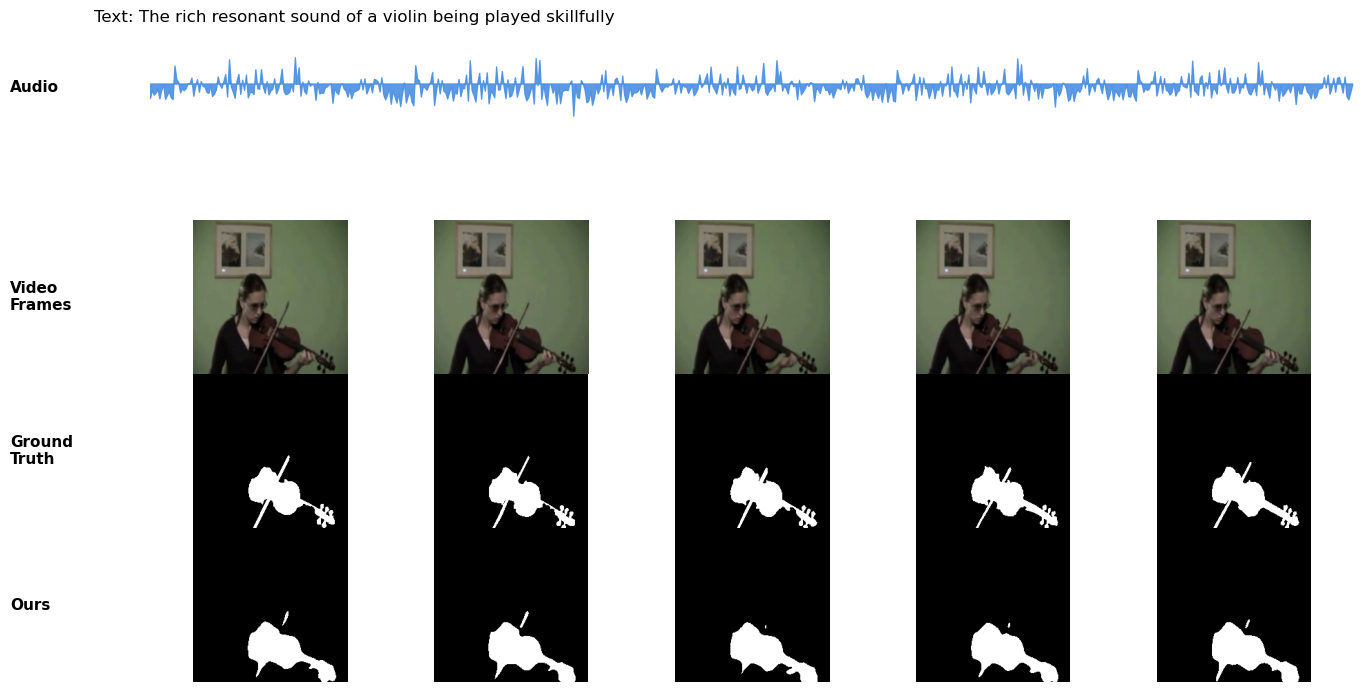

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import zipfile
import os

# Paths
text = "The rich resonant sound of a violin being played skillfully"
video_id = "-OWk1q8xH7s"

visual_frames_dir = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/Single-source/s4_data/visual_frames/test/playing_violin/{video_id}"
gt_masks_dir = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/Single-source/s4_data/gt_masks/test/playing_violin/{video_id}"
pred_masks_dir = f"/project/ag-jafra/Souptik/CMG_New/Experiments/CMG_trial1/Benchmarks/Downstream_AVS_Novel_4ep/40k/test/A2T/S4_pvt_20251026-141128/pred_masks/playing_violin/{video_id}"
audio_feature_path = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/feature/audio/test/zip/playing_violin/{video_id}.zip"

# Load audio feature from zip
with zipfile.ZipFile(audio_feature_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()
    with zip_ref.open(file_list[0]) as f:
        audio_feature = np.load(f, allow_pickle=True)

# Handle padding/truncation
if audio_feature.shape[0] < 5:
    cur_t = audio_feature.shape[0]
    add_arr = np.tile(audio_feature[-1, :], (5-cur_t, 1))
    audio_feature = np.concatenate([audio_feature, add_arr], axis=0)
elif audio_feature.shape[0] > 5:
    audio_feature = audio_feature[:5, :]

# Create figure
fig = plt.figure(figsize=(14, 7))

# Add text at the top
fig.text(0.08, 0.98, f"Text: {text}", ha='left', va='top', fontsize=12)

# Create audio subplot manually with exact positioning
ax_audio = plt.axes([0.12, 0.82, 0.86, 0.1])  # [left, bottom, width, height]
audio_flat = audio_feature.flatten()
time_axis = np.arange(len(audio_flat))
ax_audio.fill_between(time_axis, 0, audio_flat, color='#4A90E2', alpha=0.9)
ax_audio.set_xlim(0, len(audio_flat))
ax_audio.set_ylim(audio_flat.min() * 1.2, audio_flat.max() * 1.2)
ax_audio.set_yticks([])
ax_audio.set_xticks([])
ax_audio.spines['top'].set_visible(False)
ax_audio.spines['right'].set_visible(False)
ax_audio.spines['bottom'].set_visible(False)
ax_audio.spines['left'].set_visible(False)

# Add Audio label (horizontal, not rotated)
fig.text(0.02, 0.87, 'Audio', fontsize=11, weight='bold', va='center', ha='left')

# Video Frames label
fig.text(0.02, 0.57, 'Video\nFrames', fontsize=11, weight='bold', va='center', ha='left')

# Ground Truth label
fig.text(0.02, 0.35, 'Ground\nTruth', fontsize=11, weight='bold', va='center', ha='left')

# Ours label
fig.text(0.02, 0.13, 'Ours', fontsize=11, weight='bold', va='center', ha='left')

# Calculate positions for frames with NO gaps
frame_width = 0.172
frame_height_video = 0.22
frame_height_mask = 0.22
left_start = 0.12
v_gap = 0.01

# Load and display video frames
for i in range(5):
    ax = plt.axes([left_start + i * frame_width, 0.46, frame_width, frame_height_video])
    img = Image.open(f"{visual_frames_dir}/{video_id}_{i+1}.png")
    ax.imshow(img)
    ax.axis('off')

# Load and display ground truth masks
for i in range(5):
    ax = plt.axes([left_start + i * frame_width, 0.24, frame_width, frame_height_mask])
    img = Image.open(f"{gt_masks_dir}/{video_id}_{i+1}.png")
    ax.imshow(img, cmap='gray')
    ax.axis('off')

# Load and display predicted masks
for i in range(5):
    ax = plt.axes([left_start + i * frame_width, 0.02, frame_width, frame_height_mask])
    img = Image.open(f"{pred_masks_dir}/{video_id}_{i}.png")
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.show()

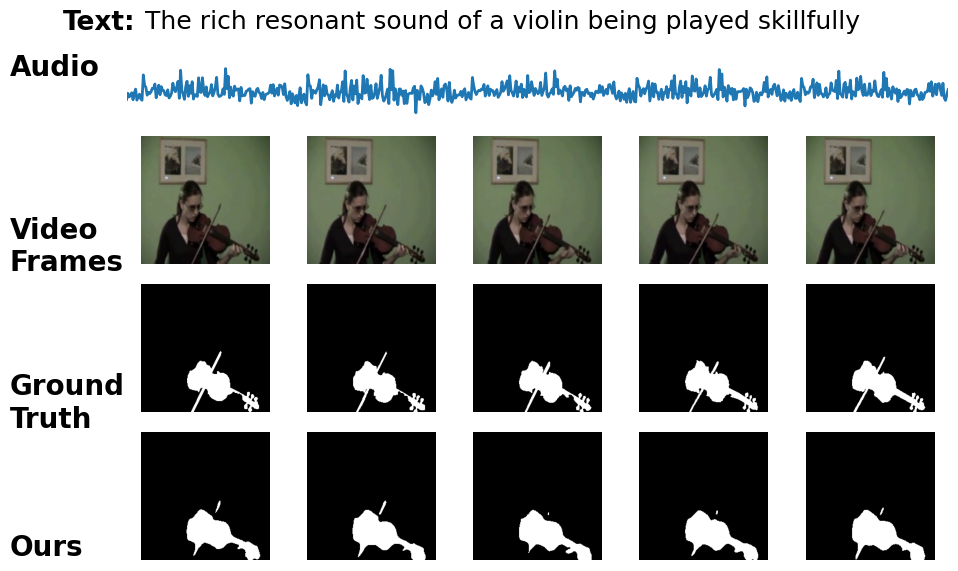

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import zipfile

# ---------- INPUTS ----------
text = "The rich resonant sound of a violin being played skillfully"
video_id = "-OWk1q8xH7s"

visual_frames_dir = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/Single-source/s4_data/visual_frames/test/playing_violin/{video_id}"
gt_masks_dir     = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/Single-source/s4_data/gt_masks/test/playing_violin/{video_id}"
pred_masks_dir   = f"/project/ag-jafra/Souptik/CMG_New/Experiments/CMG_trial1/Benchmarks/Downstream_AVS_Novel_4ep/40k/test/A2T/S4_pvt_20251026-141128/pred_masks/playing_violin/{video_id}"
audio_feature_path = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/feature/audio/test/zip/playing_violin/{video_id}.zip"

# ---------- LOAD AUDIO FEATURE ----------
with zipfile.ZipFile(audio_feature_path, 'r') as zf:
    with zf.open(zf.namelist()[0]) as f:
        audio_feature = np.load(f, allow_pickle=True)

# Pad/truncate to 5 time steps (to match 5 columns)
if audio_feature.shape[0] < 5:
    add = np.tile(audio_feature[-1, :], (5 - audio_feature.shape[0], 1))
    audio_feature = np.concatenate([audio_feature, add], axis=0)
elif audio_feature.shape[0] > 5:
    audio_feature = audio_feature[:5, :]

# Prepare waveform like the 2nd image: single stroke, centered around 0
wave = audio_feature.flatten().astype(float)
wave = wave - wave.mean()              # center
# (Optionally scale a bit for nicer headroom)
if wave.std() > 0:
    wave = wave / (2.5 * wave.std())

# ---------- FIGURE LAYOUT ----------
# Grid: 4 rows (Audio, Video, GT, Ours) × 5 columns (frames)
fig = plt.figure(figsize=(10.6, 6.4))
from matplotlib.gridspec import GridSpec
gs = GridSpec(
    nrows=4, ncols=5, figure=fig,
    height_ratios=[1.0, 2.6, 2.6, 2.6],   # audio shorter, rows below taller
    wspace=0.06,                          # small, even gaps like the 2nd figure
    hspace=0.18
)

# ---------- HEADER TEXT ----------
# “Text:” bold, followed by normal text on the same line
fig.text(0.065, 0.97, "Text:", weight='bold', ha='left', va='top', fontsize=19)
fig.text(0.135, 0.97, f" {text}", ha='left', va='top', fontsize=18)

# ---------- AUDIO (single axis spanning all 5 cols) ----------
ax_audio = fig.add_subplot(gs[0, :])
t = np.arange(len(wave))
ax_audio.plot(t, wave, linewidth=2)  # clean single-stroke waveform
ax_audio.set_xlim(0, len(wave) - 1)
pad = max(0.1, 0.05 * (np.max(np.abs(wave)) + 1e-6))
ax_audio.set_ylim(-np.max(np.abs(wave)) - pad, np.max(np.abs(wave)) + pad)
ax_audio.set_yticks([])
ax_audio.set_xticks([])
for side in ("top", "right", "bottom", "left"):
    ax_audio.spines[side].set_visible(False)

# Left labels (horizontal, bold), aligned to each row block
fig.text(0.015, 0.88, "Audio",        fontsize=20, weight='bold', ha='left', va='center')
fig.text(0.015, 0.60, "Video\nFrames", fontsize=20, weight='bold', ha='left', va='center')
fig.text(0.015, 0.355, "Ground\nTruth", fontsize=20, weight='bold', ha='left', va='center')
fig.text(0.015, 0.13, "Ours",          fontsize=20, weight='bold', ha='left', va='center')

# ---------- VIDEO FRAMES ----------
for i in range(5):
    ax = fig.add_subplot(gs[1, i])
    img = Image.open(f"{visual_frames_dir}/{video_id}_{i+1}.png")
    ax.imshow(img)
    ax.axis('off')

# ---------- GROUND TRUTH ----------
for i in range(5):
    ax = fig.add_subplot(gs[2, i])
    m = Image.open(f"{gt_masks_dir}/{video_id}_{i+1}.png")
    ax.imshow(m, cmap='gray', vmin=0, vmax=255)
    ax.axis('off')

# ---------- OURS ----------
for i in range(5):
    ax = fig.add_subplot(gs[3, i])
    # your pred files look 0..4 — keep that here
    m = Image.open(f"{pred_masks_dir}/{video_id}_{i}.png")
    ax.imshow(m, cmap='gray', vmin=0, vmax=255)
    ax.axis('off')

plt.show()


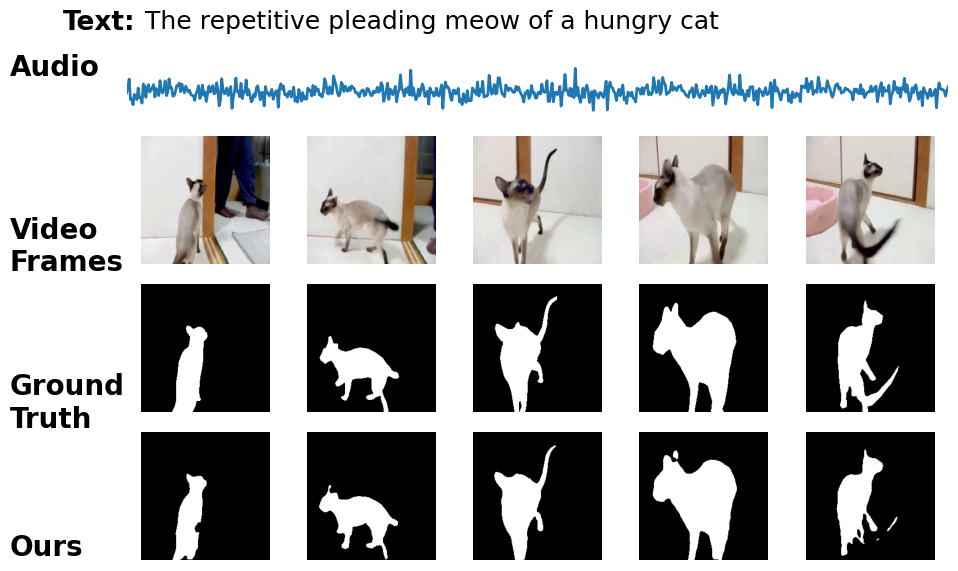

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import zipfile

# ---------- INPUTS ----------
text = "The repetitive pleading meow of a hungry cat"
video_id = "1bvRkyT2Q5I"

visual_frames_dir = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/Single-source/s4_data/visual_frames/test/cat_meowing/{video_id}"
gt_masks_dir     = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/Single-source/s4_data/gt_masks/test/cat_meowing/{video_id}"
pred_masks_dir   = f"/project/ag-jafra/Souptik/CMG_New/Experiments/CMG_trial1/Benchmarks/Downstream_AVS_Novel_4ep/40k/test/T2A/S4_pvt_20251026-140832/pred_masks/cat_meowing/{video_id}"
audio_feature_path = f"/project/ag-jafra/Souptik/VGGSoundAVEL/Data_CMG/CMG/data/data/AVSBench/feature/audio/test/zip/cat_meowing/{video_id}.zip"

# ---------- LOAD AUDIO FEATURE ----------
with zipfile.ZipFile(audio_feature_path, 'r') as zf:
    with zf.open(zf.namelist()[0]) as f:
        audio_feature = np.load(f, allow_pickle=True)

# Pad/truncate to 5 time steps (to match 5 columns)
if audio_feature.shape[0] < 5:
    add = np.tile(audio_feature[-1, :], (5 - audio_feature.shape[0], 1))
    audio_feature = np.concatenate([audio_feature, add], axis=0)
elif audio_feature.shape[0] > 5:
    audio_feature = audio_feature[:5, :]

# Prepare waveform like the 2nd image: single stroke, centered around 0
wave = audio_feature.flatten().astype(float)
wave = wave - wave.mean()              # center
# (Optionally scale a bit for nicer headroom)
if wave.std() > 0:
    wave = wave / (2.5 * wave.std())

# ---------- FIGURE LAYOUT ----------
# Grid: 4 rows (Audio, Video, GT, Ours) × 5 columns (frames)
fig = plt.figure(figsize=(10.6, 6.4))
from matplotlib.gridspec import GridSpec
gs = GridSpec(
    nrows=4, ncols=5, figure=fig,
    height_ratios=[1.0, 2.6, 2.6, 2.6],   # audio shorter, rows below taller
    wspace=0.06,                          # small, even gaps like the 2nd figure
    hspace=0.18
)

# ---------- HEADER TEXT ----------
# “Text:” bold, followed by normal text on the same line
fig.text(0.065, 0.97, "Text:", weight='bold', ha='left', va='top', fontsize=19)
fig.text(0.135, 0.97, f" {text}", ha='left', va='top', fontsize=18)

# ---------- AUDIO (single axis spanning all 5 cols) ----------
ax_audio = fig.add_subplot(gs[0, :])
t = np.arange(len(wave))
ax_audio.plot(t, wave, linewidth=2)  # clean single-stroke waveform
ax_audio.set_xlim(0, len(wave) - 1)
pad = max(0.1, 0.05 * (np.max(np.abs(wave)) + 1e-6))
ax_audio.set_ylim(-np.max(np.abs(wave)) - pad, np.max(np.abs(wave)) + pad)
ax_audio.set_yticks([])
ax_audio.set_xticks([])
for side in ("top", "right", "bottom", "left"):
    ax_audio.spines[side].set_visible(False)

# Left labels (horizontal, bold), aligned to each row block
fig.text(0.015, 0.88, "Audio",        fontsize=20, weight='bold', ha='left', va='center')
fig.text(0.015, 0.60, "Video\nFrames", fontsize=20, weight='bold', ha='left', va='center')
fig.text(0.015, 0.355, "Ground\nTruth", fontsize=20, weight='bold', ha='left', va='center')
fig.text(0.015, 0.13, "Ours",          fontsize=20, weight='bold', ha='left', va='center')

# ---------- VIDEO FRAMES ----------
for i in range(5):
    ax = fig.add_subplot(gs[1, i])
    img = Image.open(f"{visual_frames_dir}/{video_id}_{i+1}.png")
    ax.imshow(img)
    ax.axis('off')

# ---------- GROUND TRUTH ----------
for i in range(5):
    ax = fig.add_subplot(gs[2, i])
    m = Image.open(f"{gt_masks_dir}/{video_id}_{i+1}.png")
    ax.imshow(m, cmap='gray', vmin=0, vmax=255)
    ax.axis('off')

# ---------- OURS ----------
for i in range(5):
    ax = fig.add_subplot(gs[3, i])
    # your pred files look 0..4 — keep that here
    m = Image.open(f"{pred_masks_dir}/{video_id}_{i}.png")
    ax.imshow(m, cmap='gray', vmin=0, vmax=255)
    ax.axis('off')

plt.show()